<a href="https://colab.research.google.com/github/Yoshiki0418/Machine_Learning/blob/main/Classification/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 分類・識別

分類では目的変数が量的変数(数値予測など)であったが、分類では目的変数が質的変数（カテゴリ変数）になる。分類タスクでは、決定境界線を作成してデータを分類することを目的とする。この決定境界線を引く機械学習モデルを**分類器**(classifier)という。

<br>

<p align="center">
  <img src="https://datawokagaku.com/wp-content/uploads/2022/03/descision_boundary_example-1536x646.png" alt="移動平均線の説明" width="800">
</p>

特に、目的変数が2つのクラスに限定された分類を**二値分類**（binary classification）と呼びます。例えば、メールがスパムであるかそうでないか（スパム/非スパム）、ある患者が特定の病気を持っているか否か（陽性/陰性）などが二値分類の典型的な例です。

一方、目的変数が3つ以上のクラスを取りうる場合の分類を**多クラス分類**（multiclass classification）と言います。例えば、ある画像に写っている動物を犬、猫、鳥のいずれかに分類する問題などが多クラス分類にあたります。


### 分類アルゴリズム

2知分類の場合、目的変数を0,1の2値として扱う。他クラス分類の場合でも、0,1,2,・・・のように単純に数値化して量的変数のようにすることはできない。ここでの、数値化とは連続した値という意味であり、**多クラス分類の目的変数は離散的な数値**で考える必要がある。

<p align="center">
  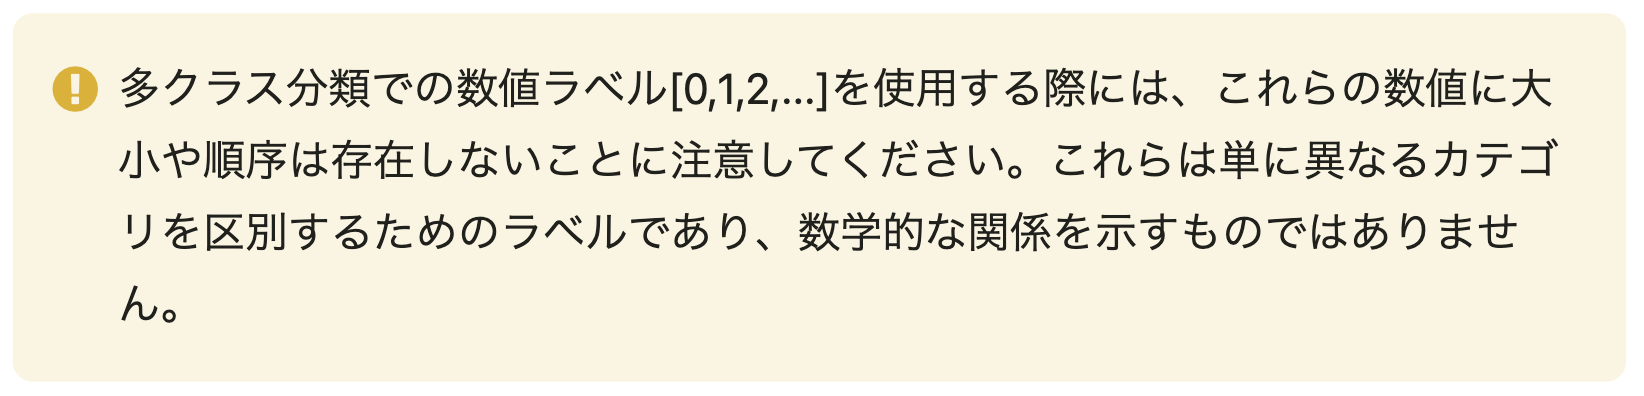
</p>

また、[0,1,2,・・・]ではなく、One-Hotエンコーディングを用いて表現することもある。例えば色の赤,青,黄の3クラスの分類では、以下のようにエンコーディングすることができる。

<p align="center">
  <img src="https://camo.qiitausercontent.com/7fc0b213e2855bda34ff53f8a550cbebfab4352e/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e61702d6e6f727468656173742d312e616d617a6f6e6177732e636f6d2f302f333638373034322f65363330316362332d613762362d646466312d333664632d3261643930653232636335642e706e67" width="500">
</p>

<p align="center">
  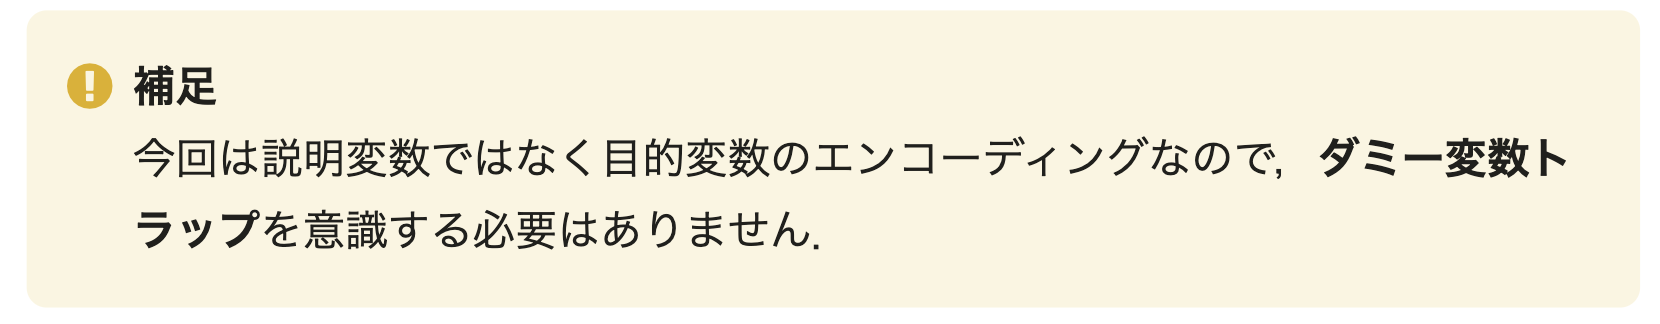
</p>





## 線形分類器

### ロジスティック回帰 (二値分類)

ロジスティック回帰は、分類アルゴリズムの最も基本的なアルゴリズムである。

与えられた入力データに基づいて、2つの可能な結果のいずれかが発生する確率を予測します。具体的には**シグモイド関数**を使用して、任意の実数の入力を0から1の間の確率値に変換します。この確率は、ある観測が特定のクラスに属するかどうかを示します。例えば、メールがスパムであるか否か、とある患者が病気にかかっているか否かなどの予測が可能になる。


#### シグモイド関数

分類問題で、そのまま回帰を使って分類しようとすると、予測値が0~1の範囲を超えてしまい解釈することができないため、回帰をそのまま分類に使用することはできない。

<p align="center">
  <img src="https://datawokagaku.com/wp-content/uploads/2022/03/reg_classify-1536x583.png" alt="移動平均線の説明" width="600">
</p>

そこで、**シグモイド関数**(ロジスティック関数)を用いて、モデルの出力を常に0〜1間に制限するアプローチがなされます。

シグモイド関数を数式で表現すると...

$$
sigmoid(x) = \frac{1}{1 + e^{-x}}
$$

という式で表され、描画すると以下のような図になります。

<p align="center">
  <img src="https://camo.qiitausercontent.com/b7590bacd625f947cf80751af28c282f020c1e36/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e61702d6e6f727468656173742d312e616d617a6f6e6177732e636f6d2f302f333638373034322f33313965393631382d346532662d396537322d323233642d6365366234363165633061392e706e67" alt="移動平均線の説明" width="600">
</p>

このように、シグモイド関数は、どのような値$x$を入れても、その結果は必ず0から1の間に収めることができる。この性質を活用して、線形回帰の結果を0~1の間に収めることを考えてみます。

<p align="center">
  <img src="https://datawokagaku.com/wp-content/uploads/2022/03/lintologi.png" alt="" width="600">
</p>

上記の図のように、シグモイド関数の$x$に線形回帰の結果である$\hat{f}(x)$を入れれば、線形回帰の結果を0〜1に収めることができる。

[Pythonでシグモイド関数を実装する際の注意点](https://qiita.com/yoshikiyamamoto06/items/960a9c1c8a6a667b7ea2)


#### ロジスティック回帰の損失関数

他の機械学習アルゴリズム同様に、損失関数を定義して損失が最小になるようなパラメータ(重み:w, バイアス;b)を求める必要がある。ロジスティック回帰では、**交差エントロピー**(cross entropy)と呼ばれる損失を用います。

交差エントロピーを数式で表すと...

<p align="center">
  <img src="https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/3687042/8962b06e-d9cc-642c-0e59-f6add337ca29.png" alt="" width="700">
</p>



##### 交差エントロピーの導出

交差エントロピーの式を導出するために、まず対数のグラフを考えてみる。

<br>

**真の値が1の時**

上記で示しているように、真の値が1の時に$log(\hat{y_i}(x_i;w,b))$と表されている。よくみると$- \frac{1}{N}Σ$が式の先頭についていることがわかる。つまり、真の値が1の時は$-log(\hat{y_i}(x_i;w,b))$を足し合わせて損失を計算しているのである。

$-log(\hat{y_i}(x_i;w,b))$をグラフで描画してみると以下のようになる

<p align="">
  <img src="https://datawokagaku.com/wp-content/uploads/2022/03/y_1_loss-1-768x448.png" alt="" width="400">
</p>

上記の図を見てわかるように、真の値が1の際に予測が1であると正解であるため損失が0になっている。一方、真の値1から予測が違うほど損失がどんどん大きくなっていることがわかる。真の値1の真逆である、0に近づくにつれて無限に損失が発生する。

<br>

**真の値が0の時**

上記で示しているように、真の値が0の時に$log(1 - \hat{y_i}(x_i;w,b))$と表されている。先ほどの同様に$- \frac{1}{N}Σ$が式の先頭についていることがわかる。つまり、真の値が0の時は$-log(1-\hat{y_i}(x_i;w,b))$を足し合わせて損失を計算しているのである。

$-log(1-\hat{y_i}(x_i;w,b))$をグラフで描画してみると以下のようになる

<p align="">
  <img src="https://datawokagaku.com/wp-content/uploads/2022/03/y_0_loss-1024x540.png" alt="" width="400">
</p>

上記の図を見てわかるように、真の値が0の際に予測が0であると正解であるため損失が0になっている。一方、真の値0から予測が違うほど損失がどんどん大きくなっていることがわかる。真の値0の真逆である、1に近づくにつれて無限に損失が発生する。

<br>

上記から、予測の値が真の値との差が大きくなればなるほど、損失が大きくなり、すべてのデータでの損失計算を足し合わせることで、そのセットでの損失が計算されることがわかった。

#### 最適化アルゴリズムで最適解を求める

機械学習では、損失関数で得られる損失を小さくしていくことで精度の高い予測モデルを作成するのであった。交差エントロピーで損失関数を定義することができたので、次に損失をできる限り小さくしていくための最適アルゴリズムが必要となる。

今回は、勾配から損失の小さい方を求めてパラメータを更新する[最急降下法](https://colab.research.google.com/drive/1rt58igp2M6v3UZmjWe-s3JzW8r14Vl-P#scrollTo=MDGeatOwnUqo)を用いて、パラメータの最適化を行なっていく。

<br>

最急降下法では、損失関数を偏微分することで勾配を求めていた。今回も損失関数を更新するための式が必要となる。

* [再喝]  損失関数（交差エントロピー）
$$
E(x, y; w, b) = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y_i}(x_i; w, b)) + (1 - y_i) \log(1 - \hat{y_i}(x_i; w, b)) \right]
$$

* モデルの推論
$$
{\bf \hat{y}}_i = \sigma({\bf W} {\bf x}_i + {\bf b})
$$

* モデルの学習(パラメータの最適化)
\begin{align*}
    \nabla_{\bf W} E &= \frac{1}{N}\sum^N_{i=1}({\bf \hat{y}}_i - {\bf y}_i) {\bf x}^{\mathrm{T}}_i \\
    \nabla_{\bf b} E &= \frac{1}{N}\sum^N_{i=1}({\bf \hat{y}}_i - {\bf y}_i)  \\
    {\bf W} &\leftarrow {\bf W} - \epsilon \nabla_{\bf W} E \\
    {\bf b} &\leftarrow {\bf b} - \epsilon \nabla_{\bf b} E \\
\end{align*}

#### ロジスティック回帰をスクラッチで実装する

In [ ]:
# ライブラリのインポートとデータのダウンロード
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = sns.load_dataset("titanic")
df = df.dropna()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


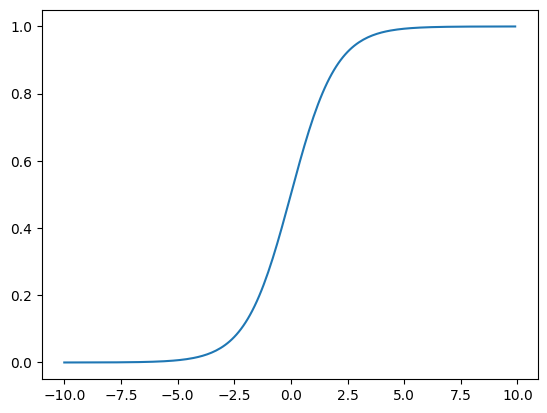

In [ ]:
# シグモイド関数を実装する
def sigmoid(x):
  return np.exp(np.minimum(x, 0)) / (1 + np.exp(-np.abs(x)))

x = np.arange(-10, 10, 0.1)
plt.plot(x, sigmoid(x.copy()))

In [ ]:
# logの中身が0になるのを防ぐ
def np_log(x):
    return np.log(np.clip(a=x, a_min=1e-10, a_max=1e+10))

In [ ]:
def train(x, y, eps=0.001):
    """
    :param x: np.ndarray, 入力データ, shape=(batch_size, 入力の次元数)
    :param y: np.ndarray, 教師ラベル, shape=(batch_size, 出力の次元数)
    :param eps: float, 学習率
    """
    global W, b

    batch_size = x.shape[0]

    # 予測
    y_hat = sigmoid(np.matmul(x, W) + b)

    # 目的関数の評価
    loss = (- np.array(y) * np_log(y_hat) - (1 - np.array(y)) * np_log(1 - y_hat)).mean()
    delta = y_hat - np.array(y)

    # 勾配の計算
    dW = np.matmul(x.T, delta) / batch_size
    db = np.mean(delta)

    # パラメータの更新
    W -= eps * dW
    b -= eps * db

    return loss

# 検証用関数
def valid(x, y):
  y_hat = sigmoid(np.matmul(x, W) + b)
  loss = -np.mean(y * np_log(y_hat) + (1 - y) * np_log(1 - y_hat))

  # 予測確率をラベルに変換 (0.5 を閾値とする)
  y_pred_labels = (y_hat > 0.5).astype(int)
  return loss, y_pred_labels

In [ ]:
# 学習データとテストデータ作成作成
X = df.loc[:, (df.columns!='survived') & (df.columns!='alive')]
X = X.select_dtypes(include=[int, float, 'bool']).astype(int)
age = X["age"].values
fare = X["fare"].values
adult_male = X["adult_male"].values
X = np.stack([age, fare, adult_male], axis=1)
y = df[['survived']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 重み (入力の次元数: 3, 出力の次元数: 1)
W = np.random.uniform(low=-0.08, high=0.08, size=(3, 1)).astype('float32')
b = np.zeros(shape=(1,)).astype('float32')

(182, 1)

In [ ]:
# 学習を開始
for epoch in range(3000):
    # x_train_or, y_train_or = shuffle(x_train_or, y_train_or)
    loss = train(X_train, y_train)
    cost, y_pred = valid(X_test, y_test)
    if epoch % 1000 == 0:
        accuracy = accuracy_score(y_test.values, y_pred)
        print(f"epoch: {epoch}, Train_cost: {loss:.3f}")
        print(f"epoch: {epoch}, Val_cost: {cost:.3f}")
        print(f"accuracy: {accuracy:.3f}")

print(f"学習完了精度は：{accuracy:.3f}です")

(127, 1)
epoch: 0, Train_cost: 0.682
epoch: 0, Val_cost: 0.661
accuracy: 0.709
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(127, 1)
(12

#### sklearnを用いてロジスティック回帰を実装

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

# titanicデータロード
df = sns.load_dataset('titanic')
df = df.dropna()

# 学習データとテストデータ作成作成
X = df.loc[:, (df.columns!='survived') & (df.columns!='alive')]
X = pd.get_dummies(X, drop_first=True)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# ロジスティック回帰モデル
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"accuracy: {accuracy:.3f}")

#生死を予測する（１が生、０が死）
print(model.predict(X_test))

accuracy: 0.764
[1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 多項ロジスティック回帰 (多クラス分類)

**多項ロジスティック回帰**は、ロジスティック回帰を多クラス分類に拡張したもので、**多クラスロジスティック回帰**、**ソフトマックス回帰**とも呼ばれることがある。

主に**機械学習**や**統計学**の分野では、この手法を**多項ロジスティック回帰**と呼ぶことが一般的である。これは、3クラス以上のカテゴリに対して分類を行う場合に用いる。

一方で、**深層学習**の分野では、最終層にこの手法をよく使用し、各クラスの確率を出力する場合に**ソフトマックス回帰**と呼ばれる。

　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　[詳細はDeep Learning資料へ](準備中)

<p align="center">
  <img src="https://resources.zero2one.jp/2022/05/softmax-1024x576.jpg" alt="移動平均線の説明" width="600">
</p>

<br>

この資料は機械学習の分類における資料であるため、以下では多項ロジスティック回帰と呼ぶこととする。



##### ソフトマックス関数

2クラス分類においては、シグモイド関数を用いて説明変数から予測を行っていたが、多クラス分類では**ソフトマックス関数**というものを使います。

シグモイド関数は以下のように表されました。
$$
sigmoid(x) = \frac{1}{1 + e^{-x}}
$$

この関数から得られる数値を、２値分類の片方のクラスに属する確率として使っていました。実際には、２つのクラスの分類であったので、片方はzで、もう片方は1-zで表されていました。

<br>

**ソフトマックス関数**は、シグモイド関数を多クラスに拡張したものです。まず、２クラスの分類をソフトマックス関数で分類するとき、以下の式になる。

$$
z = \frac{e^{x_1}}{e^{x_1} + e^{x_2}}
$$

$$
1 - z = 1 - \frac{e^{x_1}}{e^{x_1} + e^{x_2}} = \frac{e^{x_1} + e^{x_2}}{e^{x_1} + e^{x_2}} - \frac{e^{x_1}}{e^{x_1} + e^{x_2}} = \frac{e^{x_2}}{e^{x_1} + e^{x_2}}
$$

この式を一般化すると以下のようになる

$$
p_k(\mathbf{x}) = \frac{e^{x_k}}{e^{x_1} + e^{x_2} + \ldots + e^{x_K}} = \frac{e^{x_k}}{\sum_{i=1}^{K} e^{x_i}}
$$

これが、ソフトマックス関数です。Kはクラス数を表しています。この式を用いて、各クラス毎に計算した確率を足し合わせると必ず１になります。

<p align="center">
  <img src="https://cdn.apar.jp/wp-content/uploads/2019/06/activation-function-python-08.png" alt="移動平均線の説明" width="450">
</p>

Pythonでは指数の計算において、値が大きすぎることによりオーバーフローが発生してしまう問題があった。また、ソフトマックス関数は、入力に対して定数を足し引きしても結果が変わらないという性質がある。この性質を活かして入力$x_k$に対して、定数 $m = \max^K_{i=1} x_i$ を入力から引くことでオーバーフローを防ぐための実装を行うことができる。

$$
\mathrm{softmax}({\bf x})_k
= \frac{\exp({\bf x}_k)}{\sum^K_{k'=1} \exp({\bf x}_{k'})}
= \frac{\exp({\bf x}_k - m)}{\sum^K_{k'=1} \exp({\bf x}_{k'} - m)} \hspace{10mm} \text{for} \, k=1,\ldots, K
$$

また、ソフトマックス関数では、少し注意が必要な点がある。上記で示す式の入力値である$x_{k}$や、それぞれのクラスの入力を足す$x_{k'}$の定義である。これらは、線形回帰の出力を用いているのであるが、クラスを分類する際に用いられる説明変数はクラスが違っても同じである。そこで、クラス毎にパラメータ（重みw:バイアスb）を設定することでクラス間に差を出すことができる。つまり、ソフトマックス関数で3クラス以上の分類をする際には、クラス毎にパラメータを与えてあげる必要があるのだ。

##### 多項ロジスティック回帰の損失関数

損失関数の方も、多クラス対応できるように一般化する必要がある。例えば、正解が"赤"のデータに対して赤、青、黄の確率をそれぞれ、0.6, 0.1, 0.3と出力した場合、損失は$-log(0.6)$となる。

<p align="center">
  <img src="https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/3687042/2bbb0ba1-b67e-ea8a-b2c6-5c1819187c40.png" alt="移動平均線の説明" width="650">
</p>

つまり、損失は正解クラスに対する損失だけで、他のクラスの確率は損失には入ってこない。この条件から、多クラスバージョンの交差エントロピーを数式で表すと...

$$ E ({\bf x}, {\bf y}; {\bf W}, {\bf b} ) =  -\frac{1}{N}\sum^N_{i=1} \sum^K_{k=1} {\bf y}_{i, k} \log {\bf \hat{y}}_{i, k} ({\bf x}_i; {\bf W}, {\bf b}) $$

と表すことができる。$i$は$i$番目のデータで総数を$m$、クラス数は$K$として、${\bf \hat{y}}_{i, k} ({\bf x}_i; {\bf W}, {\bf b})$はソフトマックス関数におけるモデルの推論で、「$i$番目のデータ$x_i$のk番目のクラスである確率」を表している。

$$
    {\bf \hat{y}}_i = \mathrm{softmax}({\bf W}{\bf x}_i + {\bf b})
$$



##### パラメータの最適化

今回もロジスティック回帰と同様に、損失関数の値が最小になるようにパラメータ(重み:$w$,バイアス:$b$)を更新していく必要がある。これも解析的に求めることができないので、最適化問題として最急降下法を用いて解いていきます。最急降下法では、損失の勾配を元に最適化を行っていくので、損失関数をそれぞれのパラメータで偏微分する必要がある。

\begin{align*}
    \nabla_{\bf W} E &= \frac{1}{N}\sum^N_{i=1}({\bf \hat{y}}_i - {\bf y}_i ){\bf x}^{\mathrm{T}}_i \\
    \nabla_{\bf b} E &= \frac{1}{N}\sum^N_{i=1}({\bf \hat{y}}_i - {\bf y}_i) \\
    {\bf W} &\leftarrow {\bf W} - \epsilon \nabla_{\bf W} E \\
    {\bf b} &\leftarrow {\bf b} - \epsilon \nabla_{\bf b} E \\
\end{align*}

#### 多項ロジスティック回帰をスクラッチ実装する

In [ ]:
# ライブラリのインポートとデータのダウンロード
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = sns.load_dataset("iris")
df = df.dropna()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# 目的変数、説明変数の設定とトレーニングデータとテストデータの分割
y_col = "species"
df_encoded = pd.get_dummies(df, columns=[y_col])

X = df.loc[:, df.columns != y_col].values
y = df_encoded.filter(regex=y_col).values
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# 重み (入力の次元数: 4, 出力の次元数: 3)
W = np.random.uniform(low=-0.08, high=0.08, size=(4, 3)).astype('float32')
b = np.zeros(shape=(3,)).astype('float32')

In [ ]:
# ソフトマックス関数
def softmax(x, axis=1):
    x -= x.max(axis, keepdims=True) # expのoverflowを防ぐ # WRITE ME
    x_exp = np.exp(x)
    return x_exp / x_exp.sum(axis, keepdims=True)

In [ ]:
# logの中身が0になるのを防ぐ
def np_log(x):
    return np.log(np.clip(a=x, a_min=1e-10, a_max=1e+10))

In [ ]:
# トレーニング関数
def train(x, y, eps=0.0005):
    """
    :param x: np.ndarray, 入力データ, shape=(batch_size, 入力の次元数)
    :param y: np.ndarray, 教師ラベル, shape=(batch_size, 出力の次元数)
    :param eps: float, 学習率
    """

    global W, b

    batch_size = x.shape[0]

    # 予測
    y_hat = softmax(np.matmul(x, W) + b)

    # 目的関数の評価
    loss = (- y * np_log(y_hat)).sum(axis=1).mean()
    delta = y_hat - y

    # パラメータの更新
    dW = np.matmul(x.T, delta) / batch_size
    db = np.matmul(np.ones(shape=(batch_size,)), delta) / batch_size

    W -= eps * dW
    b -= eps * db

    return loss

# 検証用関数
def valid(x, y):
  y_hat = softmax(np.matmul(x, W) + b)
  loss = (- y * np_log(y_hat)).sum(axis=1).mean()

  return loss, y_hat

In [ ]:
# 学習
for epoch in range(100000):
  loss = train(X_train, y_train)
  cost, y_pred = valid(X_test, y_test)

  if epoch % 10000 == 0:
    accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
    print(f'EPOCH: {epoch+1}, Valid Cost: {cost:.3f}, Valid Accuracy: {accuracy:.3f}')


EPOCH: 1, Valid Cost: 0.144, Valid Accuracy: 0.956
EPOCH: 10001, Valid Cost: 0.144, Valid Accuracy: 0.956
EPOCH: 20001, Valid Cost: 0.143, Valid Accuracy: 0.956
EPOCH: 30001, Valid Cost: 0.142, Valid Accuracy: 0.956
EPOCH: 40001, Valid Cost: 0.142, Valid Accuracy: 0.956


#### sklearnで多項ロジスティック回帰を実装する

scikit-learnライブラリの`LogisticRegression`モデルを使う際には、エポック数などのパラメータを直接指定する必要はありません。これは、scikit-learnの`LogisticRegression`が基本的に**最適化アルゴリズムの収束条件に基づいて自動的に反復処理を停止**するからである。

　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　[詳細はscikit-learnライブラリへ](https://scikit-learn.org/stable/modules/linear_model.html#classification)

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = sns.load_dataset('iris')
y_col = 'species'
X = df.loc[:, df.columns!=y_col]
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# 多項ロジスティック回帰を実装
model = LogisticRegression(penalty='none', multi_class='multinomial')
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"accuracy: {accuracy:.3f}")

accuracy: 0.956


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


## 非線形分類

ここまでは線形分類器について学んできました。線形分類器は、特徴空間を直線や平面で分割することでデータを分類することができました。これは、計算効率が良く、解釈もしやすいという利点があるが、現実世界のデータセットは、しばしば複雑で予測が難しい構想を持っているので、線形では分離できない場合が多いのです。

**非線形分類器**は、このような複雑なデータ構造を捉える能力に優れています。非線形関数を使用することで、曲線や曲面を用いてデータを効果的に分類することができるので、実データに見られる多様なパターンや動態をモデルに組み込むことが可能となり、制度の高い予測が可能になる。

<br>

以下の図を見てください
<p align="center">
  <img src="https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/3687042/ac596c2f-c26f-42ab-f652-da83398ff0a5.png" alt="移動平均線の説明" width="450">
</p>

このデータを直線で分離できるでしょうか？直感的に、直線では綺麗に赤と青を分類することができない気がします。しかし、曲線でも良いから分類してみてと言われたらそれなりに分類できるでしょう。以下に、上記で記載したデータセットの分類を線形分類と非線形分類の学習過程をアニメーションで表示した。

  <p align="center">
    <img src="https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/3687042/88a742b5-27db-530d-19cb-043a0cd11897.gif" alt="モーメンタム法" width="500">
    <img src="https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/3687042/cd656482-ab96-7c00-1d90-6d89ea178075.gif" alt="ネステロフの加速法" width="500">
  </p>

  ２つの比較から、非線形モデルの方が精度が高くなることがわかる。

### 非線形分類器モデルの種類

1. 多項式特徴量拡張ロジスティック回帰
2. 決定木
3. ランダムフォレスト
4. 勾配ブースティングマシン
5. サポートベクターマシン (SVM)
6. k近傍法 (k-NN)
7. ニューラルネットワーク


#### 多項式特徴量拡張ロジスティック回帰

**多項式特徴量拡張ロジスティック回帰**は、線形ロジスティック回帰モデルの表現力を強化するために使用されるテクニックである。

多項式特徴量拡張は、既存の特徴から新たな多項式特徴を作成し、これをモデルに追加することにより、データの非線形構造を捉える能力を向上させている。例えば、特徴$x$がある場合に、$x^2$, $x^3$などの高次の項を特徴セットに加える。これにより、元の特徴空間をより、高次元で複雑な空間へと拡張し、線形モデルでも非線形データをより良く近似できるようにする手法である。

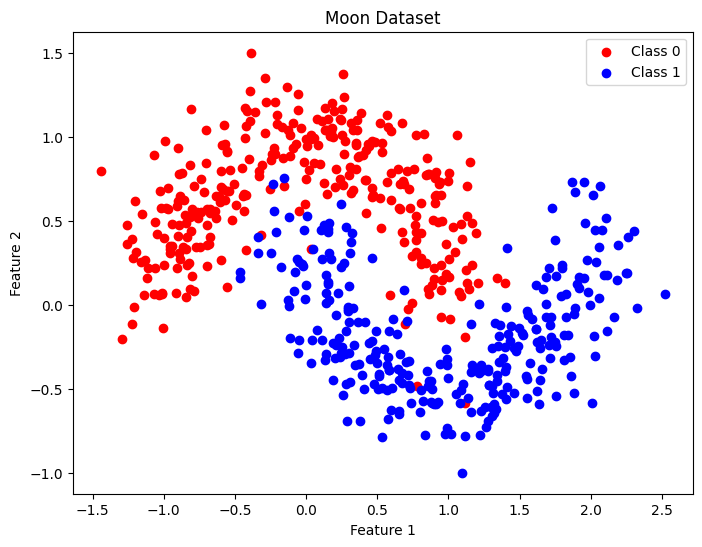

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# データ生成
X, y = make_moons(n_samples=2000, noise=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 描画用のデータ
y_test_copy = y_test

# 出力の次元を調整
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# データの描画
plt.figure(figsize=(8, 6))
plt.scatter(X_test[y_test_copy == 0][:, 0], X_test[y_test_copy == 0][:, 1], color='red', label='Class 0')  # クラス0を赤色でプロット
plt.scatter(X_test[y_test_copy == 1][:, 0], X_test[y_test_copy == 1][:, 1], color='blue', label='Class 1')  # クラス1を青色でプロット
plt.title('Moon Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()  # 凡例の表示
plt.show()


In [4]:
# 非線形モデル用の特徴変換(多項式特徴変換)
degree=3
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 入力次元数の計算
input_dimensions =  (degree+1) * ((degree+1) + 1) // 2

In [ ]:
# シグモイド関数を実装する
def sigmoid(x):
  return np.exp(np.minimum(x, 0)) / (1 + np.exp(-np.abs(x)))

# logの中身が0になるのを防ぐ
def np_log(x):
    return np.log(np.clip(a=x, a_min=1e-10, a_max=1e+10))

In [ ]:
def train(x, y, eps):
    """
    :param x: np.ndarray, 入力データ, shape=(batch_size, 入力の次元数)
    :param y: np.ndarray, 教師ラベル, shape=(batch_size, 出力の次元数)
    :param eps: float, 学習率
    """
    global W, b

    batch_size = x.shape[0]

    # 予測
    y_hat = sigmoid(np.matmul(x, W) + b)

    # 目的関数の評価
    loss = (- np.array(y) * np_log(y_hat) - (1 - np.array(y)) * np_log(1 - y_hat)).mean()
    delta = y_hat - np.array(y)
    #print(delta.shape)

    # 勾配の計算
    dW = np.matmul(x.T, delta) / batch_size
    db = np.mean(delta)

    # パラメータの更新
    W -= eps * dW
    b -= eps * db

    return loss

# 検証用関数
def valid(x, y):
  y_hat = sigmoid(np.matmul(x, W) + b)
  loss = -np.mean(y * np_log(y_hat) + (1 - y) * np_log(1 - y_hat))

  # 予測確率をラベルに変換 (0.5 を閾値とする)
  y_pred_labels = (y_hat > 0.5).astype(int)
  return loss, y_pred_labels

In [ ]:
# 重み (入力の次元数: 2, 出力の次元数: 1)
W = np.random.uniform(low=-0.08, high=0.08, size=(2, 1)).astype('float32')
b = np.zeros(shape=(1,)).astype('float32')

weights = []
biases = []
accuracies = []
costs = []

eps = 0.005

for epoch in range(10000):
    loss = train(X_train, y_train, eps)
    cost, y_pred = valid(X_test, y_test)
    accuracy = accuracy_score(y_test, y_pred)

    # パラメータと精度をリストに保存
    weights.append(W.copy())
    biases.append(b.copy())
    accuracies.append(accuracy)
    costs.append(cost)

    if epoch % 1000 == 0:
        print(f'EPOCH: {epoch+1}, Valid Cost: {cost:.3f}, Valid Accuracy: {accuracy:.3f}')

print(f"学習完了精度は：{accuracy:.3f}です")

fig, ax = plt.subplots(figsize=(10, 6))

def plot_decision_boundary(ax, W, b):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b)
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='RdBu', alpha=0.5)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolors='k')

def update(epoch):
    idx = epoch * 100  # 100エポックごとのインデックス
    W = weights[idx]
    b = biases[idx]
    ax.clear()
    plot_decision_boundary(ax, W, b)
    ax.set_title(f'Epoch: {idx + 1}, Accuracy: {accuracies[idx]:.4f}')
    return ax,

# アニメーションのフレーム数を計算
frame_count = (len(weights) + 99) // 100

ani = FuncAnimation(fig, update, frames=frame_count, interval=50, blit=False)
HTML(ani.to_html5_video())

html = HTML(ani.to_html5_video())
# 図を閉じる（この図をノートブック上に表示しない）
plt.close(fig)
display(html)

EPOCH: 1, Valid Cost: 0.705, Valid Accuracy: 0.345
EPOCH: 1001, Valid Cost: 0.461, Valid Accuracy: 0.817
EPOCH: 2001, Valid Cost: 0.393, Valid Accuracy: 0.835
EPOCH: 3001, Valid Cost: 0.361, Valid Accuracy: 0.842
EPOCH: 4001, Valid Cost: 0.343, Valid Accuracy: 0.847
EPOCH: 5001, Valid Cost: 0.331, Valid Accuracy: 0.850
EPOCH: 6001, Valid Cost: 0.322, Valid Accuracy: 0.852
EPOCH: 7001, Valid Cost: 0.316, Valid Accuracy: 0.853
EPOCH: 8001, Valid Cost: 0.310, Valid Accuracy: 0.853
EPOCH: 9001, Valid Cost: 0.306, Valid Accuracy: 0.857
学習完了精度は：0.857です


In [ ]:
# 多項式特徴量の重み (入力の次元数: input_dimensionsで求めた次元, 出力の次元数: 1)
W = np.random.uniform(low=-0.08, high=0.08, size=(input_dimensions, 1)).astype('float32')
b = np.zeros(shape=(1,)).astype('float32')

weights = []
biases = []
accuracies = []
costs2 = []

eps = 0.05

# 線形モデルの学習を開始
for epoch in range(10000):
    # x_train_or, y_train_or = shuffle(x_train_or, y_train_or)
    loss = train(X_train_poly, y_train, eps)
    cost, y_pred = valid(X_test_poly, y_test)
    weights.append(W.copy())
    biases.append(b.copy())
    accuracies.append(accuracy)
    costs2.append(cost)

    if epoch % 1000 == 0:
        accuracy = accuracy_score(y_test, y_pred)
        print(f'EPOCH: {epoch+1}, Valid Cost: {cost:.3f}, Valid Accuracy: {accuracy:.3f}')

print(f"学習完了精度は：{accuracy:.3f}です")

# 決定境界のプロット
def plot_decision_boundary(ax, W, b):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    Z = sigmoid(np.dot(poly.transform(np.c_[xx.ravel(), yy.ravel()]), W) + b)
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap='RdBu', alpha=0.5)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train.flatten(), cmap='viridis', edgecolors='k')

fig, ax = plt.subplots(figsize=(10, 6))

def update(epoch):
    idx = epoch * 100  # 100エポックごとのインデックス
    W = weights[idx]
    b = biases[idx]
    ax.clear()
    plot_decision_boundary(ax, W, b)
    ax.set_title(f'Epoch: {idx + 1}, Accuracy: {accuracies[idx]:.4f}')
    return ax,

# アニメーションのフレーム数を計算
frame_count = (len(weights) + 99) // 100

ani = FuncAnimation(fig, update, frames=frame_count, interval=50, blit=False)

html = HTML(ani.to_html5_video())
# 図を閉じる（この図をノートブック上に表示しない）
plt.close(fig)
display(html)

EPOCH: 1, Valid Cost: 0.707, Valid Accuracy: 0.355
EPOCH: 1001, Valid Cost: 0.228, Valid Accuracy: 0.903
EPOCH: 2001, Valid Cost: 0.193, Valid Accuracy: 0.920
EPOCH: 3001, Valid Cost: 0.172, Valid Accuracy: 0.928
EPOCH: 4001, Valid Cost: 0.158, Valid Accuracy: 0.933
EPOCH: 5001, Valid Cost: 0.148, Valid Accuracy: 0.940
EPOCH: 6001, Valid Cost: 0.141, Valid Accuracy: 0.943
EPOCH: 7001, Valid Cost: 0.135, Valid Accuracy: 0.950
EPOCH: 8001, Valid Cost: 0.130, Valid Accuracy: 0.950
EPOCH: 9001, Valid Cost: 0.126, Valid Accuracy: 0.955
学習完了精度は：0.955です


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# データの例
epochs = len(costs)  # コストリストから取得されるエポック数
epochs2 = len(costs2)  # 非線形分類器のエポック数

# グラフの設定
fig, ax = plt.subplots()
line1, = ax.plot([], [], label='Linear Classifier')
line2, = ax.plot([], [], label='Non-linear Classifier')
ax.set_xlim(0, max(epochs, epochs2))
ax.set_ylim(min(min(costs), min(costs2)), max(max(costs), max(costs2)))
ax.set_xlabel('Epochs')
ax.set_ylabel('Cost')
ax.legend()

# 初期化関数
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2

# アップデート関数の修正
def update(frame):
    # frameに100を掛けることでインデックスを生成
    idx = frame * 100
    line1.set_data(range(idx), costs[:idx])
    line2.set_data(range(idx), costs2[:idx])
    return line1, line2

# framesの計算方法の修正
frame_count = max((epochs + 99) // 100, (epochs2 + 99) // 100)  # 両方のデータソースを考慮

# アニメーションの作成
ani = FuncAnimation(fig, update, frames=frame_count, init_func=init, blit=True, interval=50)

# 図を閉じる（この図をノートブック上に表示しない）
plt.close(fig)

# HTMLとして表示
HTML(ani.to_html5_video())
